##  Over and Downregulation
In this part we want to detect reactions that could be over expressed or down regulated in order to increase the production of our objective resveratrol.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from cameo.core import manipulation
from cameo import fba, flux_variability_analysis
from cobra.io import read_sbml_model

In [2]:
# Verify working directory and change it if needed
os.getcwd()
os.chdir("C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/") #change accordingly

In [3]:
# Read the heterologous model
model=read_sbml_model("data/models/yeast8_resv_glc.xml")

In [4]:
m=model.copy() # copy of our model in order to compare the reference model with modified model
manipulation.increase_flux(m.reactions.EX_glc__D_e, -1.0, -4.0) 

print("The maximum growth rate after increased glucose uptake is: ", m.optimize().objective_value, "mmol/gDW*h")
print("The maximum growth rate of the reference model is: ", model.optimize().objective_value, "mmol/gDW*h")

The maximum growth rate after increased glucose uptake is:  0.3370162254153097 mmol/gDW*h
The maximum growth rate of the reference model is:  0.08192811254621682 mmol/gDW*h


In [5]:
biomass_objective = m.optimize().objective_value
biomass_objective_ref = model.optimize().objective_value

m.reactions.GROWTH.lower_bound = biomass_objective*0.5 # set the minimum biomass to be 50% of the flux
model.reactions.GROWTH.lower_bound = biomass_objective_ref*0.5

print("Biomass bounds now are:", m.reactions.GROWTH.bounds)
print("Biomass bounds of the reference model are now are:", model.reactions.GROWTH.bounds)

Biomass bounds now are: (0.16850811270765484, 1000.0)
Biomass bounds of the reference model are now are: (0.04096405627310841, 1000.0)


#### Flux Scanning based on Enforced Objective Flux

In [6]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [7]:
# Apply the Flux Scanning based on Enforced Objective Flux from the cameo package
fseof = FSEOF(m)
fseof_ref=FSEOF(model)

In [8]:
# Define the final reaction for trans-resveratrol reaction as objective
## the result shows that the amount of reaction rate of the reaction VVVST1 has increased by fold 10
result = fseof.run(target=m.reactions.VVVST1)
df=result.data_frame
df

,1,2,3,4,5,6,7,8,9,10
DDPAm,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
DHQTi,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
DHQS,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
PSCVT,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
ALASm,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001
...,...,...,...,...,...,...,...,...,...,...
pc160181SLIMErm,0.006609,0.006298,0.005987,0.005675,0.005363,0.005052,0.004740,0.004429,0.004117,0.003806
ACONTm,2.371203,2.274844,2.179100,2.083356,1.987611,1.891867,1.796123,1.700379,1.604635,1.508891
HA-TAL,0.057476,0.114951,0.172427,0.229902,0.287378,0.344854,0.402329,0.459805,0.517281,0.574756
AT-4CL1,0.057476,0.114951,0.172427,0.229902,0.287378,0.344854,0.402329,0.459805,0.517281,0.574756


In [9]:
result_ref = fseof_ref.run(target=model.reactions.VVVST1)
df_ref=result_ref.data_frame
df_ref

,1,2,3,4,5,6,7,8,9,10
DDPAm,0.046870,0.059295,0.071716,0.084138,0.096559,0.108980,0.121401,0.133823,0.146244,0.158665
DHQTi,0.046870,0.059295,0.071716,0.084138,0.096559,0.108980,0.121401,0.133823,0.146244,0.158665
DHQS,0.046870,0.059295,0.071716,0.084138,0.096559,0.108980,0.121401,0.133823,0.146244,0.158665
PSCVT,0.046870,0.059295,0.071716,0.084138,0.096559,0.108980,0.121401,0.133823,0.146244,0.158665
ACCOAC,0.134575,0.172134,0.209682,0.247231,0.284779,0.322327,0.359876,0.397424,0.434972,0.472521
...,...,...,...,...,...,...,...,...,...,...
ACP1_FMN,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000000,-0.000000
ALATA_L,-0.044148,-0.042072,-0.039991,-0.037909,-0.035828,-0.033747,-0.031665,-0.029584,-0.027503,-0.025421
HA-TAL,0.013972,0.027944,0.041917,0.055889,0.069861,0.083833,0.097806,0.111778,0.125750,0.139722
AT-4CL1,0.013972,0.027944,0.041917,0.055889,0.069861,0.083833,0.097806,0.111778,0.125750,0.139722


[Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$'),
 Text(0.5, 0, '# of modelling steps'),
 Text(0.5, 1.0, 'Increase of reaction VVVST1 for resveratrol production of both models')]

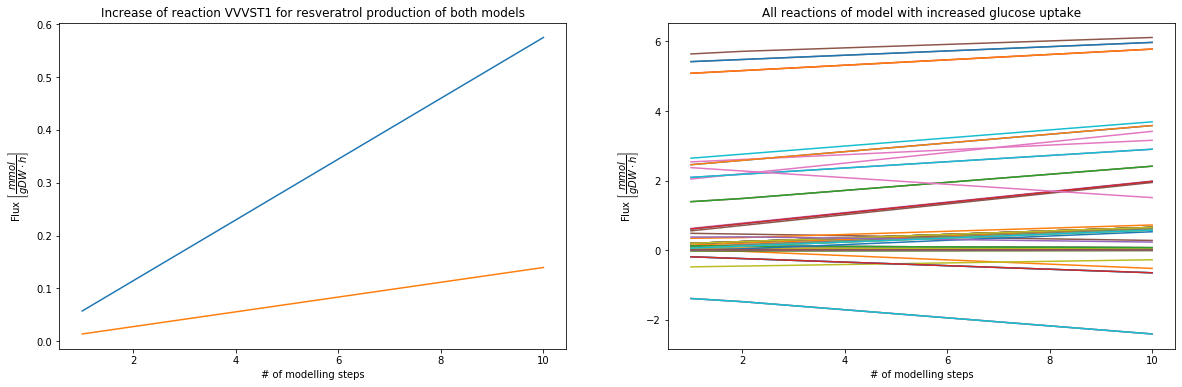

In [10]:
fig,(ax1, ax2)=plt.subplots(1,2, figsize=(20,6))
ax2.plot(df.T)
ax2.set(title='All reactions of model with increased glucose uptake', xlabel='# of modelling steps', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')
ax1.plot(df.loc['VVVST1'])
ax1.plot(df_ref.loc['VVVST1'])
ax1.set(title='Increase of reaction VVVST1 for resveratrol production of both models', xlabel='# of modelling steps', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')

#### Flux Balance Analysis

In [11]:
# flux balance analysis with the objective to growth
fba_res=fba(m, objective=m.reactions.GROWTH)
fba_base=fba_res.data_frame
fba_base.sort_values(by='flux', ascending=False, inplace=True)
print('flux of oxygen uptake: ', fba_base.loc['EX_o2_e'][0], 'mmol/gDW*h')
print('flux of glucose uptake: ', fba_base.loc['EX_glc__D_e'][0], 'mmol/gDW*h')
print('biomass production: ', fba_base.loc['GROWTH'][0], 'mmol/gDW*h')
print('flux of resveratrol production: ', fba_base.loc['VVVST1'][0], 'mmol/gDW*h')
fba_base

flux of oxygen uptake:  -8.909530944764098 mmol/gDW*h
flux of glucose uptake:  -4.0 mmol/gDW*h
biomass production:  0.33701622541531706 mmol/gDW*h
flux of resveratrol production:  0.0 mmol/gDW*h


,flux
FERCOXOXI,34.451887
ATPtm,24.436599
ATPS3m,22.563156
PIt2m,19.634620
UBICRED,17.225944
...,...
EX_glc__D_e,-4.000000
CO2tm,-7.901500
EX_o2_e,-8.909531
H2Ot,-17.166546


In [12]:
# flux balance analysis with the objective to the production of resveratrol
fba_res=fba(m, objective=m.reactions.VVVST1)
fba_rsv=fba_res.data_frame
fba_rsv.sort_values(by='flux', ascending=False, inplace=True)
print('flux of oxygen uptake: ', fba_rsv.loc['EX_o2_e'][0], 'mmol/gDW*h')
print('flux of glucose uptake: ', fba_rsv.loc['EX_glc__D_e'][0], 'mmol/gDW*h')
print('biomass production: ', fba_rsv.loc['GROWTH'][0], 'mmol/gDW*h')
print('flux of resveratrol production: ', fba_rsv.loc['VVVST1'][0], 'mmol/gDW*h')
fba_rsv

flux of oxygen uptake:  -6.556181141205269 mmol/gDW*h
flux of glucose uptake:  -4.0 mmol/gDW*h
biomass production:  0.16850811270765484 mmol/gDW*h
flux of resveratrol production:  0.6386183439469032 mmol/gDW*h


,flux
FERCOXOXI,25.631606
ATPtm,18.742827
ATPS3m,17.637816
EX_h2o_e,16.751563
UBICRED,12.815803
...,...
EX_glc__D_e,-4.000000
CO2tm,-4.412254
EX_o2_e,-6.556181
H2Ot,-16.751563


#### Downregulation
We apply several filter to find the reactions that decrease while the reaction rate of the resveratrol production increases.

In [13]:
# Filter 1 for reactions that decrease while the resveratrol flux increases
df1=df[abs(df[1])>abs(df[10])]
print(df1.shape)
df1

(69, 10)


,1,2,3,4,5,6,7,8,9,10
ALASm,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001
ACGKm,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
ACOTAim,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
GALT,0.482346,0.459662,0.436922,0.414182,0.391442,0.368702,0.345962,0.323222,0.300482,0.277742
GCC2am,0.025407,0.024212,0.023014,0.021816,0.020618,0.019421,0.018223,0.017025,0.015827,0.014630
...,...,...,...,...,...,...,...,...,...,...
PC181181trmmm,-0.002744,-0.002615,-0.002486,-0.002357,-0.002227,-0.002098,-0.001968,-0.001839,-0.001710,-0.001580
ERGSTtrrm,0.011872,0.011314,0.010754,0.010194,0.009635,0.009075,0.008515,0.007955,0.007396,0.006836
pc161SLIMErm,0.000937,0.000893,0.000849,0.000804,0.000760,0.000716,0.000672,0.000628,0.000584,0.000539
pc160181SLIMErm,0.006609,0.006298,0.005987,0.005675,0.005363,0.005052,0.004740,0.004429,0.004117,0.003806


In [14]:
# Filter 2 for reactions theirs difference is bigger than 0.1 so that reactions with very very low rates are filtered out
df2=df1[abs(df1[1]-df1[10])>0.05]
print(df2.shape)
df2=df2.sort_values(by=[10], ascending=False)
df2

(9, 10)


,1,2,3,4,5,6,7,8,9,10
ACONTm,2.371203,2.274844,2.179100,2.083356,1.987611,1.891867,1.796123,1.700379,1.604635,1.508891
GALT,0.482346,0.459662,0.436922,0.414182,0.391442,0.368702,0.345962,0.323222,0.300482,0.277742
ICDHym,0.373732,0.380335,0.361520,0.342704,0.323888,0.305073,0.286257,0.267442,0.248626,0.229810
ACGKm,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
ACOTAim,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
AGPRim,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
ORNTACim,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
ORNt3m,0.120331,0.114672,0.108999,0.103326,0.097653,0.091980,0.086307,0.080634,0.074961,0.069288
UGLT,-0.482346,-0.459662,-0.436922,-0.414182,-0.391442,-0.368702,-0.345962,-0.323222,-0.300482,-0.277742


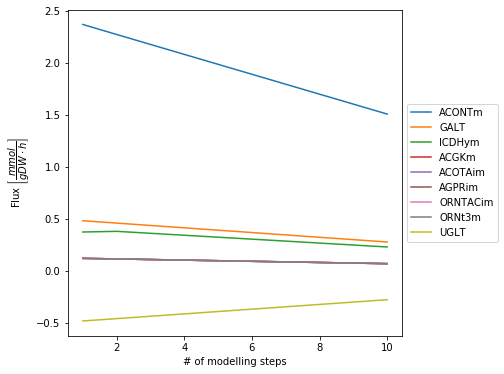

In [15]:
df2.T.plot(figsize=(6,6))
plt.xlabel('# of modelling steps')
plt.ylabel(r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
# List of the most important reactions for down regulation
down=df2.index.values.tolist()
d=[]
for rx in down:
    ID = m.reactions.get_by_id(rx)
    flux_g=fba_base.loc[ID.id]
    flux_r=fba_rsv.loc[ID.id]
    d.append([ID.id,ID.name, flux_g[0], flux_r[0]])
df_d=pd.DataFrame(d, columns=['Reaction ID', 'Reaction name', 'Flux when growth optimized in mmol/gDW*h', 'Flux when product optimized in mmol/gDW*h'])
df_d

,Reaction ID,Reaction name,Flux when growth optimized in mmol/gDW*h,Flux when product optimized in mmol/gDW*h
0,ACONTm,citrate hydroxymutase,2.468435,1.402508
1,GALT,galactose-1-phosphate uridylyltransferase,0.504950,0.252475
2,ICDHym,isocitrate dehydrogenase,0.331077,0.208904
3,ACGKm,acetylglutamate kinase,0.125970,0.062985
4,ACOTAim,acteylornithine transaminase,0.125970,0.062985
5,AGPRim,N-acetyl-g-glutamyl-phosphate reductase,0.125970,0.062985
6,ORNTACim,ornithine transacetylase,0.125970,0.062985
7,ORNt3m,ornithine transport,0.125970,0.062985
8,UGLT,UDPglucose--hexose-1-phosphate uridylyltransfe...,-0.504950,-0.252475


### Overexpression

In [17]:
# Filter for reactions theirs flux increases with the resveratrol flux
df3=df[abs(df[1])<abs(df[10])]
print(df3.shape)
df3

(41, 10)


,1,2,3,4,5,6,7,8,9,10
DDPAm,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
DHQTi,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
DHQS,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
PSCVT,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679
ACCOAC,0.553581,0.708083,0.862541,1.016998,1.171456,1.325913,1.480371,1.634828,1.789285,1.943743
ACS,0.624997,0.776140,0.927231,1.078321,1.229412,1.380503,1.531593,1.682684,1.833774,1.984865
ADK1,2.642546,2.758986,2.875145,2.991305,3.107464,3.223623,3.339783,3.455942,3.572101,3.688260
ALDD2y,0.606248,0.758273,0.910248,1.062222,1.214197,1.366171,1.518146,1.670120,1.822095,1.974069
CHORM,0.144710,0.198083,0.251446,0.304809,0.358172,0.411535,0.464898,0.518261,0.571624,0.624987
CHORS,0.192802,0.243914,0.295009,0.346105,0.397201,0.448296,0.499392,0.550488,0.601584,0.652679


In [18]:
df4=df3[(abs(df3[10])-df3[1])>0.85]
print(df4.shape)
df4.head(10)

(13, 10)


,1,2,3,4,5,6,7,8,9,10
ACCOAC,0.553581,0.708083,0.862541,1.016998,1.171456,1.325913,1.480371,1.634828,1.789285,1.943743
ACS,0.624997,0.776140,0.927231,1.078321,1.229412,1.380503,1.531593,1.682684,1.833774,1.984865
ADK1,2.642546,2.758986,2.875145,2.991305,3.107464,3.223623,3.339783,3.455942,3.572101,3.688260
ALDD2y,0.606248,0.758273,0.910248,1.062222,1.214197,1.366171,1.518146,1.670120,1.822095,1.974069
PGI,2.043839,2.196012,2.348420,2.500828,2.653236,2.805643,2.958051,3.110459,3.262867,3.415275
PPAm,2.455748,2.580973,2.705939,2.830905,2.955870,3.080836,3.205802,3.330768,3.455734,3.580699
PYRDC,0.606248,0.758273,0.910248,1.062222,1.214197,1.366171,1.518146,1.670120,1.822095,1.974069
HCO3En,1.392621,1.483484,1.599582,1.715679,1.831777,1.947874,2.063972,2.180069,2.296167,2.412264
HCO3tn,-1.392621,-1.483484,-1.599582,-1.715679,-1.831777,-1.947874,-2.063972,-2.180069,-2.296167,-2.412264
CO2tn,-1.392621,-1.483484,-1.599582,-1.715679,-1.831777,-1.947874,-2.063972,-2.180069,-2.296167,-2.412264


In [20]:
over=df4.index.values.tolist()
o=[]
for rx in over:
    ID = model.reactions.get_by_id(rx)
    flux_g=fba_base.loc[ID.id]
    flux_r=fba_rsv.loc[ID.id]
    o.append([ID.id,ID.name, flux_g[0], flux_r[0]])
df_o=pd.DataFrame(o, columns=['Reaction ID', 'Reaction name', 'Flux when growth optimized in mmol/gDW*h', 'Flux when product optimized in mmol/gDW*h'])
df_o

,Reaction ID,Reaction name,Flux when growth optimized in mmol/gDW*h,Flux when product optimized in mmol/gDW*h
0,ACCOAC,"acetyl-CoA carboxylase, reaction",0.399016,2.115363
1,ACS,acetyl-CoA synthetase,0.473779,2.152744
2,ADK1,adenylate kinase,2.525707,3.817327
3,ALDD2y,"aldehyde dehydrogenase (acetaldehyde, NADP)",0.454151,2.142931
4,PGI,glucose-6-phosphate isomerase,1.891998,3.584617
5,PPAm,inorganic diphosphatase,2.330155,3.719551
6,PYRDC,pyruvate decarboxylase,0.454151,2.142931
7,HCO3En,bicarbonate formation,1.337545,2.541262
8,HCO3tn,bicarbonate transport,-1.337545,-2.541262
9,CO2tn,CO2 transport,-1.337545,-2.541262


In [27]:
m.reactions.get_by_id('ACCOAC')

Reaction identifier,ACCOAC
Name,"acetyl-CoA carboxylase, reaction"
Memory address,0x019e54cd1048
Stoichiometry,accoa_c + atp_c + hco3_c --> adp_c + h_c + malcoa_c + pi_c acetyl-CoA + ATP + bicarbonate --> ADP + H+ + malonyl-CoA + phosphate
GPR,YDL141W and YNR016C
Lower bound,0.0
Upper bound,1000.0
